Ex1



In [2]:
from google.colab import files
import zipfile
import pandas as pd

uploaded = files.upload()

Saving Weather Data Munich 1954-2022.zip to Weather Data Munich 1954-2022.zip


In [3]:
with zipfile.ZipFile("Weather Data Munich 1954-2022.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [12]:
df = pd.read_csv("weatherdata.csv", sep=';')
df.head()

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,3379,19540601,-999,-999.0,-999.0,1,0.0,1,-999.0,0,-999.0,-999.0,-999.0,14.0,-999.0,17.6,10.4,-999.0,eor
1,3379,19540602,-999,-999.0,-999.0,1,0.5,1,-999.0,0,-999.0,-999.0,-999.0,13.2,-999.0,19.7,9.7,-999.0,eor
2,3379,19540603,-999,-999.0,-999.0,1,0.0,1,-999.0,0,-999.0,-999.0,-999.0,16.6,-999.0,21.9,8.2,-999.0,eor
3,3379,19540604,-999,-999.0,-999.0,1,1.2,1,-999.0,0,-999.0,-999.0,-999.0,15.2,-999.0,17.3,11.8,-999.0,eor
4,3379,19540605,-999,-999.0,-999.0,1,6.0,1,-999.0,0,-999.0,-999.0,-999.0,15.2,-999.0,17.7,13.7,-999.0,eor


In [13]:
rows_before = df.shape[0]
print(f"Rows before removing duplicates: {rows_before}")

Rows before removing duplicates: 25051


In [16]:
df.replace(-999, pd.NA, inplace=True)

In [18]:
df.isna().sum()

,0
STATIONS_ID,0
MESS_DATUM,0
QN_3,11172
FX,11258
FM,11242
QN_4,0
RSK,0
RSKF,0
SDK,305
SHK_TAG,1567


In [17]:
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")


Number of duplicates: 0


In [20]:
df.columns = df.columns.str.strip()

In [21]:
missing_counts = df.isnull().sum()
print("Columns with missing values:")
print(missing_counts[missing_counts > 0])

Столбцы с пропущенными значениями:
QN_3       11172
FX         11258
FM         11242
SDK          305
SHK_TAG     1567
NM         11191
VPM        11177
PM         11177
UPM        11177
TGK        11188
dtype: int64


In [25]:
df = df.dropna(subset=["SDK"])

for col in ["FM", "FX", "NM", "VPM", "PM", "UPM", "TGK"]:
    df[col] = df[col].fillna(df[col].median())


df["SHK_TAG"] = df["SHK_TAG"].fillna(0)
df["QN_3"] = df["QN_3"].fillna(9)
df = df.infer_objects(copy=False)

In [26]:
print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


 Exercise 3: Feature Engineering

In [27]:
df["MESS_DATUM"] = pd.to_datetime(df["MESS_DATUM"], format="%Y%m%d")

df["year"] = df["MESS_DATUM"].dt.year
df["month"] = df["MESS_DATUM"].dt.month
df["day"] = df["MESS_DATUM"].dt.day
df["dayofweek"] = df["MESS_DATUM"].dt.dayofweek


In [29]:
#Temperature range
df["temp_range"] = df["TXK"] - df["TNK"]

In [31]:
#c) Rain flag based on RSK (precipitation amount)
df["had_rain"] = (df["RSK"] > 0).astype(int)


In [32]:
print(df.select_dtypes(include=["object"]).columns)

Index(['eor'], dtype='object')


In [33]:
print(df["eor"].unique())

['eor']


In [34]:
df = df.drop(columns=["eor"])

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ["RSK", "TXK", "TNK", "FM", "FX", "temp_range"]

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [36]:
df.head()

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,...,UPM,TXK,TNK,TGK,year,month,day,dayofweek,temp_range,had_rain
304,3379,1955-04-01,9,-0.172243,-0.133043,1,-0.445368,0,7.7,0,...,74.0,-0.760728,-1.233492,5.1,1955,4,1,4,0.463156,0
305,3379,1955-04-02,9,-0.172243,-0.133043,1,-0.445368,0,8.5,0,...,74.0,-0.494354,-0.508181,5.1,1955,4,2,5,-0.224255,0
306,3379,1955-04-03,9,-0.172243,-0.133043,1,-0.428380,1,10.0,0,...,74.0,-0.094794,-1.005944,5.1,1955,4,3,6,1.583382,1
307,3379,1955-04-04,9,-0.172243,-0.133043,1,1.830965,1,0.2,0,...,74.0,-0.316772,-0.152637,5.1,1955,4,4,0,-0.453392,1
308,3379,1955-04-05,9,-0.172243,-0.133043,1,-0.173567,1,0.0,0,...,74.0,-0.527651,0.046468,5.1,1955,4,5,1,-1.293562,1


In [37]:
import plotly.express as px

fig = px.scatter(df, x="TXK", y="RSK", title="Осадки vs Температура")
fig.show()

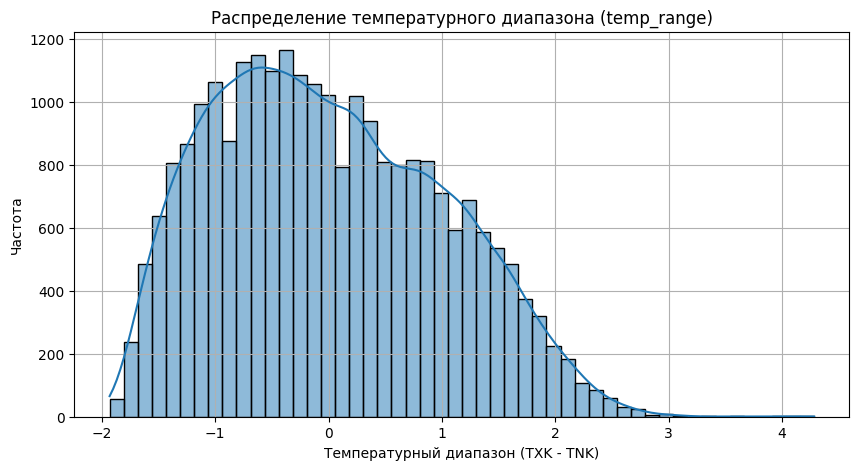

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df["temp_range"], bins=50, kde=True)
plt.title("Распределение температурного диапазона (temp_range)")
plt.xlabel("Температурный диапазон (TXK - TNK)")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

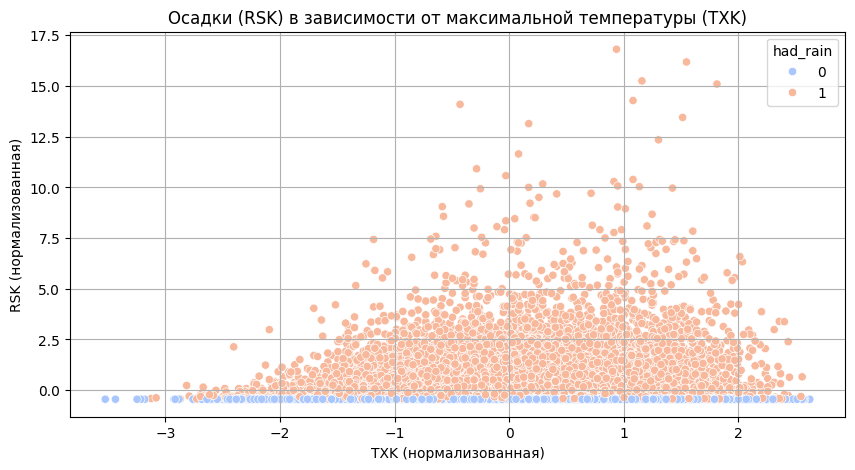

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="TXK", y="RSK", hue="had_rain", palette="coolwarm")
plt.title("Осадки (RSK) в зависимости от максимальной температуры (TXK)")
plt.xlabel("TXK (нормализованная)")
plt.ylabel("RSK (нормализованная)")
plt.grid(True)
plt.show()


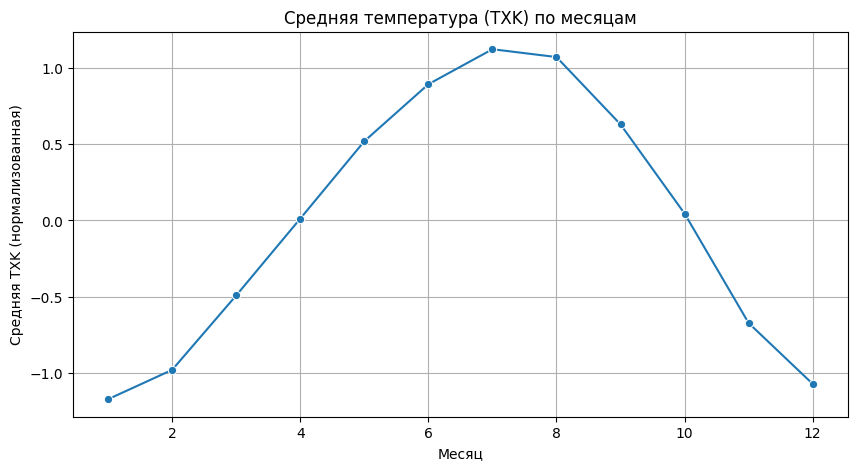

In [40]:
df_grouped = df.groupby("month")["TXK"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x="month", y="TXK", marker="o")
plt.title("Средняя температура (TXK) по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Средняя TXK (нормализованная)")
plt.grid(True)
plt.show()


Exercise 4: Outlier Detection and Handling
IQR is more versatile

In [41]:
cols_to_check = ["TXK", "TNK", "RSK", "FM", "FX", "temp_range"]


In [45]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in cols_to_check:
    outliers, low, high = detect_outliers_iqr(df, col)
    print(f"{col}: found {len(outliers)} outliers, limits: [{low:.2f}, {high:.2f}]")

TXK: found 0 outliers, limits: [-3.13, 3.13]
TNK: found 0 outliers, limits: [-3.06, 3.14]
RSK: found 0 outliers, limits: [-1.11, 0.66]
FM: found 0 outliers, limits: [-0.81, 0.44]
FX: found 0 outliers, limits: [-0.76, 0.48]
temp_range: found 0 outliers, limits: [-3.14, 3.07]


In [43]:
def cap_outliers(data, column):
    outliers, lower, upper = detect_outliers_iqr(data, column)
    data[column] = data[column].clip(lower=lower, upper=upper)
    return data

for col in cols_to_check:
    df = cap_outliers(df, col)


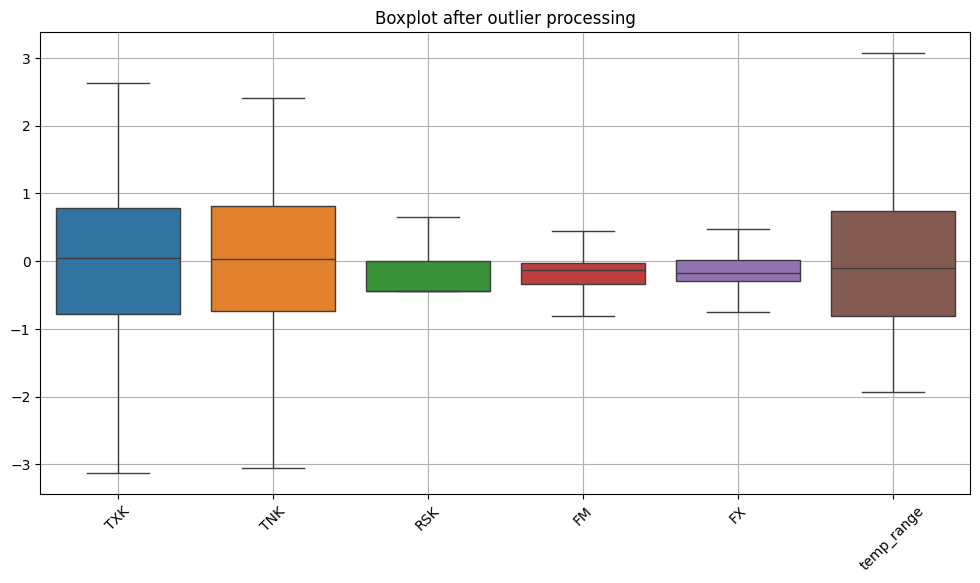

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_to_check])
plt.title("Boxplot after outlier processing")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Exercise 5: Data Standardization and Normalization

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns



In [49]:
# Standardization - for normal type distributions
standardize_cols = ["TXK", "TNK", "FM", "FX", "RSK", "temp_range"]

# Normalization - for functions with limited value
normalize_cols = ["UPM", "TGK", "SHK_TAG", "RSKF"]

scaler = StandardScaler()
df[standardize_cols] = scaler.fit_transform(df[standardize_cols])

minmax = MinMaxScaler()
df[normalize_cols] = minmax.fit_transform(df[normalize_cols])


In [50]:
print(df.head())

     STATIONS_ID MESS_DATUM  QN_3        FX        FM  QN_4       RSK   RSKF  \
304         3379 1955-04-01     9 -0.051794  0.043539     1 -0.667232  0.000   
305         3379 1955-04-02     9 -0.051794  0.043539     1 -0.667232  0.000   
306         3379 1955-04-03     9 -0.051794  0.043539     1 -0.625137  0.125   
307         3379 1955-04-04     9 -0.051794  0.043539     1  2.068933  0.125   
308         3379 1955-04-05     9 -0.051794  0.043539     1  0.006285  0.125   

      SDK  SHK_TAG  ...    UPM       TXK       TNK       TGK  year  month  \
304   7.7      0.0  ...  0.675 -0.760862 -1.237660  0.636971  1955      4   
305   8.5      0.0  ...  0.675 -0.494455 -0.510377  0.636971  1955      4   
306  10.0      0.0  ...  0.675 -0.094844 -1.009493  0.636971  1955      4   
307   0.2      0.0  ...  0.675 -0.316850 -0.153866  0.636971  1955      4   
308   0.0      0.0  ...  0.675 -0.527756  0.045780  0.636971  1955      4   

     day  dayofweek  temp_range  had_rain  
304    1    

Exercise 6: Feature Encoding


In [53]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns
print("Categorical features:", cat_cols.tolist())

Категориальные признаки: []


Exercise 7: Data Transformation for Age Feature


In [61]:
import pandas as pd

# New bins in 5 degree increments from -20 to 50 (including top edge)
bins = list(range(-20, 55, 5))  # [-20, -15, -10, ..., 45, 50]

# Let's create labels for each range, for example: "-20--15", "-15--10", etc.
labels = [f"{bins[i]} to {bins[i+1]}" for i in range(len(bins)-1)]

# Categorization by new bins
df['TGK_group'] = pd.cut(df['TGK'], bins=bins, labels=labels, right=False)  # right=False: интервал [a, b)

# One-hot encoding
TGK_dummies = pd.get_dummies(df['TGK_group'], prefix='TGK')

# Join with the main table
df = pd.concat([df, TGK_dummies], axis=1)

# (optional) Remove the original TGK_group column if no longer needed
df.drop(columns=['TGK_group'], inplace=True)

In [62]:
print(df.head())

     STATIONS_ID MESS_DATUM  QN_3        FX        FM  QN_4       RSK   RSKF  \
304         3379 1955-04-01     9 -0.051794  0.043539     1 -0.667232  0.000   
305         3379 1955-04-02     9 -0.051794  0.043539     1 -0.667232  0.000   
306         3379 1955-04-03     9 -0.051794  0.043539     1 -0.625137  0.125   
307         3379 1955-04-04     9 -0.051794  0.043539     1  2.068933  0.125   
308         3379 1955-04-05     9 -0.051794  0.043539     1  0.006285  0.125   

      SDK  SHK_TAG  ...  TGK_0 to 5  TGK_5 to 10  TGK_10 to 15  TGK_15 to 20  \
304   7.7      0.0  ...        True        False         False         False   
305   8.5      0.0  ...        True        False         False         False   
306  10.0      0.0  ...        True        False         False         False   
307   0.2      0.0  ...        True        False         False         False   
308   0.0      0.0  ...        True        False         False         False   

     TGK_20 to 25  TGK_25 to 30  TGK_3

In [63]:
print(df.filter(like='TGK_').head())

     TGK_Very Cold  TGK_Cold  TGK_Mild  TGK_Warm  TGK_Hot  TGK_-20 to -15  \
304          False      True     False     False    False           False   
305          False      True     False     False    False           False   
306          False      True     False     False    False           False   
307          False      True     False     False    False           False   
308          False      True     False     False    False           False   

     TGK_-15 to -10  TGK_-10 to -5  TGK_-5 to 0  TGK_0 to 5  TGK_5 to 10  \
304           False          False        False        True        False   
305           False          False        False        True        False   
306           False          False        False        True        False   
307           False          False        False        True        False   
308           False          False        False        True        False   

     TGK_10 to 15  TGK_15 to 20  TGK_20 to 25  TGK_25 to 30  TGK_30 to 35  \
304

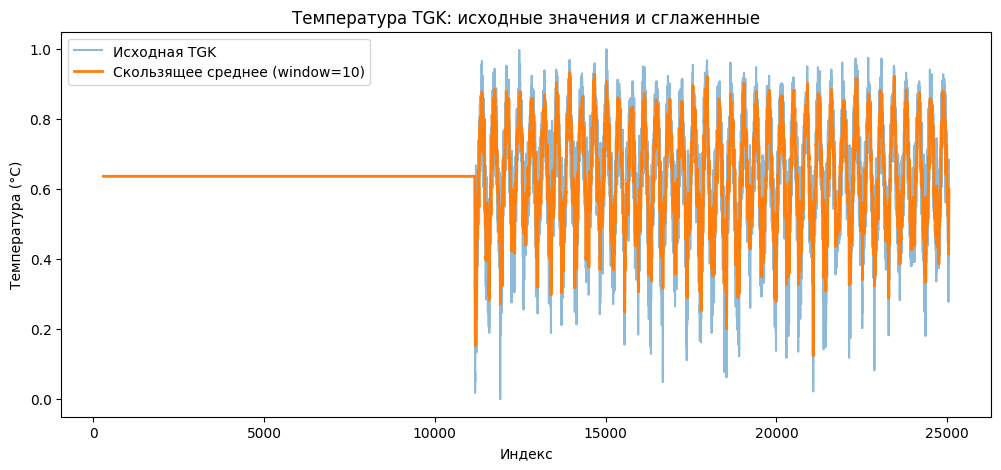

In [65]:
import matplotlib.pyplot as plt

# Сортируем по индексу или по времени (если есть)
df_sorted = df.sort_index()

# Добавим столбец со скользящим средним с окном 10 (можно менять)
df_sorted['TGK_smooth'] = df_sorted['TGK'].rolling(window=10, min_periods=1).mean()

# Построим график: исходная температура и сглаженная
plt.figure(figsize=(12,5))
plt.plot(df_sorted['TGK'], label='Исходная TGK', alpha=0.5)
plt.plot(df_sorted['TGK_smooth'], label='Скользящее среднее (window=10)', linewidth=2)
plt.title('Температура TGK: исходные значения и сглаженные')
plt.xlabel('Индекс')
plt.ylabel('Температура (°C)')
plt.legend()
plt.show()